## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

## Reading data

Note that we dismiss Canary Islands, Balearic Islands Ceuta and Melilla because they are not considered in the demand data 

In [2]:
cities = pd.read_csv('cities_unified.csv', header = 0)
cities = cities[(cities['Provincias'] != 'Melilla') & (cities['Provincias'] != 'Ceuta') & (cities['Provincias'] != 'Santa Cruz de Tenerife') & (cities['Provincias'] != 'Palmas, Las') & (cities['Provincias'] != 'Balears, Illes')]
cities.reset_index(drop=True, inplace = True)
cities.tail()

,Codigos,Provincias,Latitud,Longitud,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
43,47,Valladolid,41.634126,-4.847191,529157,526288,523679,521130,519851,519546,520649,519361,517975,521333
44,48,Bizkaia,43.237680,-2.852600,1151905,1148775,1147576,1148302,1149628,1152651,1159443,1154334,1149344,1153282
45,49,Zamora,41.727174,-5.980539,185432,183436,180406,177404,174549,172539,170588,168725,167215,166927
46,50,Zaragoza,41.620365,-1.064497,960111,956006,950507,953486,954811,964693,972528,967452,966438,979365
47,0,TOTAL ESPAÑA,39.695119,-3.202023,46771341,46624382,46557008,46572132,46722980,47026208,47450795,47385107,47475420,48085361


In [3]:
ipc = pd.read_csv('IPC.csv', header = 0)
ipc = ipc[(ipc['Provincia'] != 'Melilla') & (ipc['Provincia'] != 'Ceuta') & (ipc['Provincia'] != 'Santa Cruz de Tenerife') & (ipc['Provincia'] != 'Palmas, Las') & (ipc['Provincia'] != 'Balears, Illes')]
ipc.reset_index(drop=True, inplace = True)
ipc.tail()

,Codigo,Provincia,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014,7-2014,8-2014,...,3-2023,4-2023,5-2023,6-2023,7-2023,8-2023,9-2023,10-2023,11-2023,12-2023
43,47,Valladolid,93498,93451,93566,94419,94369,94419,93600,93776,...,111670,112360,112194,112770,112780,113328,113457,114086,113459,113537
44,48,Bizkaia,92529,92402,92640,93555,93525,93561,92738,92900,...,111128,111660,111744,112665,112700,113205,113485,113534,113198,113152
45,49,Zamora,93284,93234,93511,94390,94414,94352,93307,93525,...,113086,113937,113791,114536,114620,115011,115115,115517,114885,115055
46,50,Zaragoza,93588,93570,93708,94676,94661,94614,93792,93965,...,110967,111417,111269,111873,112310,112893,112907,113042,112828,112710
47,0,TOTAL ESPAÑA,93373,93333,93541,94373,94395,94421,93533,93681,...,111111,111773,111719,112354,112544,113149,113348,113676,113280,113308


In [4]:
demanda_meteo = pd.read_csv('demanda_meteo.csv', header = 0)
demanda_meteo['Datetime'] = pd.to_datetime(demanda_meteo['Datetime'])
demanda_meteo.head()

,Datetime,Demanda Real,Demanda Prevista,Demanda Programada,Demanda D+1,Precio,temperature_2m_1,direct_normal_irradiance_instant_1,wind_speed_100m_1,temperature_2m_2,...,wind_speed_100m_50,temperature_2m_51,direct_normal_irradiance_instant_51,wind_speed_100m_51,temperature_2m_52,direct_normal_irradiance_instant_52,wind_speed_100m_52,temperature_2m_0,direct_normal_irradiance_instant_0,wind_speed_100m_0
0,2014-01-01 00:00:00,24301.66667,23878.33333,24099.0,0.0,37.21,7.4985,0.0,16.099690,7.874,...,30.758411,11.714001,0.0,17.339897,10.032000,0.0,11.659777,5.791485,0.0,18.565381
1,2014-01-01 01:00:00,23365.33333,23322.00000,22269.0,0.0,30.57,7.0485,0.0,17.388409,7.724,...,30.312773,11.614000,0.0,18.000000,9.731999,0.0,10.661107,5.709594,0.0,18.443398
2,2014-01-01 02:00:00,21672.50000,21711.16667,21136.0,0.0,26.30,7.3985,0.0,19.319628,7.574,...,27.792374,11.564000,0.0,17.651016,9.932000,0.0,11.212135,5.620734,0.0,18.401250
3,2014-01-01 03:00:00,20192.00000,20230.33333,19911.0,0.0,26.18,7.3485,0.0,20.140705,7.424,...,25.772078,11.464001,0.0,18.430452,10.432000,0.0,12.620554,5.597380,0.0,18.198554
4,2014-01-01 04:00:00,19220.66667,19215.33333,19060.0,0.0,22.40,7.4985,0.0,21.995380,7.374,...,23.732710,11.464001,0.0,18.161278,10.582000,0.0,14.058450,5.656951,0.0,18.100382


In [5]:
festivos = pd.read_csv('Festivos.csv', header = 0)
festivos['Day'] = pd.to_datetime(festivos['Day'])
festivos = festivos.drop(['Melilla', 'Ceuta', 'Santa Cruz de Tenerife', 'Palmas, Las', 'Balears, Illes'], axis = 1)
festivos.head()

,Day,Day of the week,"Coruña, A",Albacete,Alicante/Alacant,Almería,Araba/Álava,Asturias,Badajoz,Barcelona,...,Soria,Tarragona,Teruel,Toledo,Valencia/València,Valladolid,Zamora,Zaragoza,Ávila,sumafest
0,2014-01-01,X,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1.000000
1,2014-01-02,J,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.019659
2,2014-01-03,V,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
3,2014-01-04,S,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,2014-01-05,D,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000


In [6]:
pib = pd.read_csv('PIB.csv', header = 0)
pib.head()

,Codigo,Provincia,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014,7-2014,8-2014,...,3-2023,4-2023,5-2023,6-2023,7-2023,8-2023,9-2023,10-2023,11-2023,12-2023
0,0,TOTAL ESPAÑA,925468,925468,925468,969598,969598,969598,960418,960418,...,1099141,1139036,1139036,1139036,1127405,1127405,1127405,1171293,1171293,1171293


## X and Y creation and definition of the metrics

In [7]:
ndays_base = 28
ntemps = 5
nrads = 5
normalization = True
name_file = str(ndays_base)+'Days-'+str(ntemps)+'Temps-'+str(nrads)+'Rads.csv'

In [8]:
combined_base = pd.read_csv('./Base Inputs/Variations/'+name_file,header=0)
combined_base['Datetime'] = pd.to_datetime(combined_base['Datetime'])

In [9]:
cols = combined_base.columns
if normalization:
    normalization_parameters = {i:[] for i in cols[4:]}
    for name in cols[4:]:
        aux = combined_base[name].values
        delta = max(aux)-min(aux)
        minimo = min(aux)
        normalization_parameters[name].append(delta)
        normalization_parameters[name].append(minimo)
        aux = (aux - min(aux))/(max(aux)-min(aux))
        combined_base[name] = aux
    normalization_parameters = pd.DataFrame(normalization_parameters)
    normalization_parameters = normalization_parameters.rename(index={0: 'Delta', 1: 'Minimo'})
    print (normalization_parameters)

          F         L        M        X         J         V        S  \
Delta   1.0  5.784642  7.22602  7.22602  7.244857  7.244857  7.22602   
Minimo  0.0  0.000000  0.00000  0.00000  0.000000  0.000000  0.00000   

             IPC       Demanda  Temp_Ocean  ...  Temp_Med_S  Temp_Arido  \
Delta   0.049660  19473.440477   24.296530  ...   25.021825   28.537216   
Minimo  0.980921  18153.351190  -12.109515  ...  -13.621727  -15.437454   

        Temp_Cont    Rad_Ocean    Rad_Med_N    Rad_Med_S    Rad_Arido  \
Delta   26.177648  1228.312175  1464.261728  1347.446777  1444.313131   
Minimo -13.733033  -594.248623  -779.341384  -765.815529  -835.420535   

           Rad_Cont     Viento      Precio  
Delta   1265.719331  45.945262  351.530714  
Minimo  -729.556146 -16.960417   11.779643  

[2 rows x 21 columns]


In [10]:
años_train = 8
años_validation = 1
años_test = 10 - años_train - años_validation

start_year = 2014
days_year = [365,365,366,365,365,365,366,365,365,365]
days_month = [31,28,31,30,31,30,31,31,30,31,30,31]
days_bisiesto = [31,29,31,30,31,30,31,31,30,31,30,31]

days_training = sum (days_year[:años_train])
hours_training = 24*days_training

days_validation = sum (days_year[años_train:años_train+años_validation])
hours_validation = 24*days_validation

days_testing = sum(days_year[años_train+años_validation:])
hours_testing = 24*days_testing

In [11]:
x = []
y = []
x_train = []
x_val = []
x_test = []
y_train = []
y_val = []
y_test = []
prevision = []
prevision_train = []
prevision_val = []
prevision_test = []

In [12]:
filtered_df = combined_base[combined_base['Datetime'].dt.year - start_year < años_train]
for index, row in filtered_df.iterrows():
    x_train.append(row[1:]) ## dropeamos datetime

filtered_df = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train < años_validation) & (combined_base['Datetime'].dt.year - start_year - años_train >= 0) ]
for index, row in filtered_df.iterrows():
    x_val.append(row[1:]) ## dropeamos datetime

filtered_df = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (combined_base['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]
for index, row in filtered_df.iterrows():
    x_test.append(row[1:]) ## dropeamos datetime

x = x_train + x_val + x_test 

In [13]:
threshold = combined_base['Datetime'][0]
auxdemanda = demanda_meteo[demanda_meteo['Datetime']>=threshold]
auxdemanda.reset_index(drop=True, inplace=True)
print (auxdemanda['Datetime'][0])
for i in range (len(auxdemanda)):
    if normalization:
        real = (auxdemanda['Demanda Real'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
        prevista = (auxdemanda['Demanda D+1'][i] - normalization_parameters['Demanda']['Minimo'])/normalization_parameters['Demanda']['Delta']
    else:
        real = auxdemanda['Demanda Real'][i]
        prevista = auxdemanda['Demanda D+1'][i]
    
    y.append(real)
    prevision.append(prevista)

    if (auxdemanda['Datetime'][i].year- start_year < años_train):
        y_train.append(real)
        prevision_train.append(prevista)

    elif (auxdemanda['Datetime'][i].year- start_year - años_train < años_validation):
        y_val.append(real)
        prevision_val.append(prevista)

    elif (auxdemanda['Datetime'][i].year - start_year - años_train - años_validation < años_test):
        y_test.append(real)
        prevision_test.append(prevista)

2014-02-01 00:00:00


In [14]:
print (len(x), len(x_train), len(x_val), len(x_test))

86904 69384 8760 8760


In [15]:
exog_train = combined_base[combined_base['Datetime'].dt.year - start_year < años_train]
exog_val = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train < años_validation) & (combined_base['Datetime'].dt.year - start_year - años_train >= 0) ]
exog_test = combined_base[(combined_base['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (combined_base['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]

exog_train = exog_train.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)
exog_val = exog_val.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)
exog_test = exog_test.drop(['Datetime', 'Demanda', 'Precio', 'IPC'], axis=1)

# Concatenate exog_train and exog_val into a single DataFrame
exog_train_val = pd.concat([exog_train, exog_val]).reset_index(drop=True)

exog_train_val_test = pd.concat([exog_train_val, exog_test]).reset_index(drop=True)

exog_val = exog_val.reset_index(drop=True)
exog_test = exog_test.reset_index(drop=True)

# Functions that will be used later

In [16]:
lags = [24*i for i in range(1, ndays_base+1)]
lags = sorted(lags)

In [17]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor

def fit_model (y_,flag_exog,exog, lags=lags,model=XGBRegressor()):
    
    # Crear el forecaster
    # ==============================================================================
    forecaster = ForecasterAutoreg(
                     regressor = model,
                     lags = lags
                 )

    # Entrena el forecaster
    # ==============================================================================
    if flag_exog:
        forecaster.fit(y=pd.Series(y_), 
                         exog=exog)
    else:
        forecaster.fit(y=pd.Series(y_))
    
    return forecaster

In [18]:
def predict (forecaster, y_, start, npreds, flag_exog, exog, lags=lags,steps = 24):
    cont = 0
    preds_list = []
    start_window = start-max(lags)
    end_window = start
    while cont < npreds:
        window = pd.Series(y_[start_window:end_window])

        if flag_exog:
            window_exog = exog.loc[cont:cont+steps]
            window_exog = window_exog.reset_index(drop=True, inplace=False)
            window_exog.index = window_exog.index + len(window)
    #         print (window_exog)
            preds = forecaster.predict(steps=steps,last_window=window,exog=window_exog)

        else:
            preds = forecaster.predict(steps=steps,last_window=window)

        preds_list.append(list(preds))

        cont += steps
        start_window += steps
        end_window += steps

    predictions = [item for sublist in preds_list for item in sublist]
    
    return predictions

In [19]:
def scatter_predictions (y_,predictions):
    plt.title ('Real vs Predicted')
    plt.scatter(y_, predictions)
    plt.plot([min(min(y_),min(predictions)),max(max(y_),max(predictions))], [min(min(y_),min(predictions)),max(max(y_),max(predictions))])
    plt.xlabel('Real')
    plt.ylabel('Predicted')
    plt.show()

In [20]:
def plot_evolution (y_,predictions,prevision,ndias=100):
    plt.title ('Evolucion de predicciones')
    plt.plot(predictions[:ndias], label = 'XGB')
    plt.plot(y_[:ndias], label = 'Validation set')
    plt.plot(prevision[:ndias], label = 'Prevision')
    plt.legend(loc='lower left')
    plt.show()

In [21]:
def metrics (preds, val, normalized = normalization):
    df = {}
    if normalized:
        auxpreds = np.array(preds)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
        auxval = np.array(val)*normalization_parameters['Demanda']['Delta']+normalization_parameters['Demanda']['Minimo']
    else:
        auxpreds = np.array(preds)
        auxval = np.array(val)
#     all_hours = pd.date_range(start=df['Date'].min(), end=df['Date'].max() + pd.Timedelta(days=1), freq='H')[:-1]

    df['Datetime'] = demanda_meteo[(demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation < años_test) & (demanda_meteo['Datetime'].dt.year - start_year - años_train - años_validation >= 0)]['Datetime']
    df['Error'] = auxpreds-auxval
    df['Absolute Error'] = abs(df['Error'])
    df['Squared Error'] = (auxpreds-auxval)*(auxpreds-auxval)
    df['Relative Error'] = 100*abs((auxpreds-auxval)/auxval)
    overall = [np.sqrt(np.mean(df['Error']*df['Error'])), np.mean(df['Absolute Error']),np.mean(df['Relative Error']), max(df['Absolute Error'])]
    
    # Assuming your dictionary is named 'data_dict'
    # Concatenate dataframes from the dictionary into one large dataframe
#     combined_df = pd.concat([d.assign(datetime=pd.to_datetime(df['Datetime'], format='%d-%m-%Y') + pd.DateOffset(hours=hour)) 
#                              for hour, d in df.items()])
#     combined_df = pd.concat([d for d in df.items()])

    print([[name, len(df[name])] for name in df.keys()])
    df = pd.DataFrame(df)
    # Sort the dataframe by the datetime column
    df = df.sort_values(by='Datetime')

    # Convert datetime column to the desired format (day-month-year hour)
#     combined_df['Datetime'] = combined_df['Datetime'].dt.strptime(combined_df['Datetime'], '%Y-%m-%d %H:%M:%S')

    # Optionally, reset index if needed
    df = df.reset_index(drop=True)

    # Now, combined_df contains the concatenated and sorted dataframe with the desired datetime format,
    # where the hour comes from the key of the dictionary
    
    return df,overall
#     return combined_df

# Linear

In [22]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import LinearRegression

# Crear el forecaster
# ==============================================================================
Linear_forecaster = ForecasterAutoreg(
                 regressor = LinearRegression(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags
            )
             
# Entrena el forecaster
# ==============================================================================
Linear_forecaster.fit(y=pd.Series(y_train+y_val),
                  exog = exog_train_val)
# forecaster

In [23]:
Linear_predictions = predict (Linear_forecaster, y, len(y_train+y_val), len(y_test), True, exog_test)

In [24]:
df_Linear, Linear_metrics = metrics(Linear_predictions, y_test)
Linear_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[1125.6511613553837, 818.7812227158225, 3.1897791392504904, 10158.89531360101]

## XGBoost

In [25]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from xgboost.sklearn import XGBRegressor

# Crear el forecaster
# ==============================================================================
XGB_forecaster = ForecasterAutoreg(
                 regressor = XGBRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags
            )
             
# Entrena el forecaster
# ==============================================================================
XGB_forecaster.fit(y=pd.Series(y_train+y_val),
                  exog = exog_train_val)
# forecaster

In [26]:
XGB_predictions = predict (XGB_forecaster, y, len(y_train+y_val), len(y_test), True, exog_test)

In [27]:
df_XGB, XGB_metrics = metrics(XGB_predictions, y_test)
XGB_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[793.2025138323992, 570.9370375107546, 2.209481964553227, 5903.052829011111]

# Regressive Models

### LGBM forecaster

In [28]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from lightgbm import LGBMRegressor

# Crear el forecaster
# ==============================================================================
LGBM_forecaster = ForecasterAutoreg(
                 regressor = LGBMRegressor(verbose=-1),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags
            )
             
# Entrena el forecaster
# ==============================================================================
LGBM_forecaster.fit(y=pd.Series(y_train+y_val),
                  exog = exog_train_val)
# forecaster

In [29]:
LGBM_predictions = predict (LGBM_forecaster, y, len(y_train+y_val), len(y_test), True, exog_test)

In [30]:
df_LGBM, LGBM_metrics = metrics(LGBM_predictions, y_test)
LGBM_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[851.6162863848489, 610.1992500711868, 2.3725206066756983, 4878.113160390763]

# Random Forest

In [31]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor

# Crear el forecaster
# ==============================================================================
RF_forecaster = ForecasterAutoreg(
                 regressor = RandomForestRegressor(),
#                  lags = [1, 2, 3] + [24*i-1 for i in range(1, 8)] + [24*i for i in range(1, 8)] + [24*i+1 for i in range(1, 8)]
                 lags = lags
            )
             
# Entrena el forecaster
# ==============================================================================
RF_forecaster.fit(y=pd.Series(y_train+y_val),
                  exog = exog_train_val)
# forecaster

In [32]:
RF_predictions = predict (RF_forecaster, y, len(y_train+y_val), len(y_test), True, exog_test)

In [33]:
df_RF, RF_metrics = metrics(RF_predictions, y_test)
RF_metrics

[['Datetime', 8760], ['Error', 8760], ['Absolute Error', 8760], ['Squared Error', 8760], ['Relative Error', 8760]]


[919.1650425334346, 637.578505082968, 2.4542599423270786, 6331.093332900004]

# Error analysis

In [49]:
errors = {}
errors['Linear'] = Linear_metrics
errors['XGBoost'] = XGB_metrics
errors['LGBM'] = LGBM_metrics
errors['RF'] = RF_metrics
errors = pd.DataFrame (errors)

errors = errors.rename(index={0: 'RMSE', 1: 'MAE', 2:'MAX'})

errors

,Linear,XGBoost,LGBM,RF
RMSE,1125.651161,793.202514,851.616286,919.165043
MAE,818.781223,570.937038,610.199250,637.578505
MAX,3.189779,2.209482,2.372521,2.454260
3,10158.895314,5903.052829,4878.113160,6331.093333


In [50]:
df_errors = {}
df_errors ['Linear'] = df_Linear
df_errors ['XGBoost'] = df_XGB
df_errors ['LGBM'] = df_LGBM
df_errors ['RF'] = df_RF

In [51]:
def hourly_error (type_of_error):
    errors_horas = {name:[] for name in df_errors.keys()}
    for name in errors_horas.keys():
        for i in range (24):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour == i]
            if type_of_error == 'RMSE':
                errors_horas[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_horas[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_horas[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_horas[name].append(max(auxdf['Relative Error']))
            
    errors_horas = pd.DataFrame (errors_horas)
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Hour')
    plt.plot(errors_horas, label=errors_horas.columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.plot()
    return errors_horas

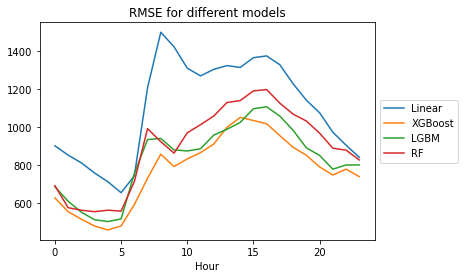

In [52]:
errors_horas_rmse = hourly_error ('RMSE')

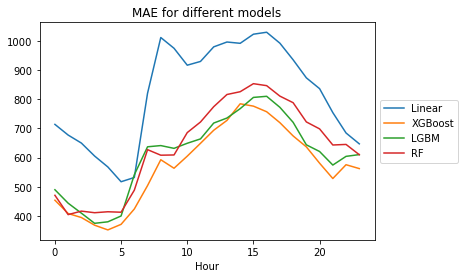

In [53]:
errors_horas_mae = hourly_error ('MAE')

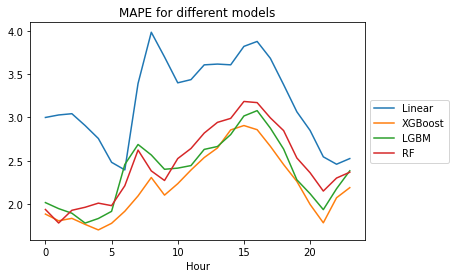

In [54]:
errors_horas_mae = hourly_error ('MAPE')

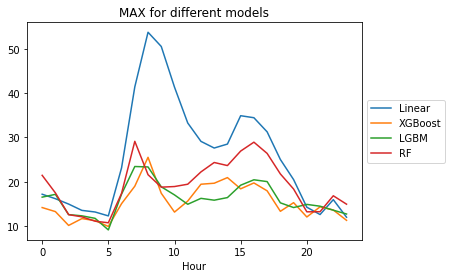

In [55]:
errors_horas_mae = hourly_error ('MAX')

In [56]:
def weekly_error(type_of_error):
    errors_weekly = {name: [] for name in df_errors.keys()}
    for name in errors_weekly.keys():
        for i in range(7):
            auxdf = df_errors[name][df_errors[name]['Datetime'].dt.weekday == i]
            if type_of_error == 'RMSE':
                errors_weekly[name].append(np.sqrt(np.mean(auxdf['Squared Error'])))
            elif type_of_error == 'MAE':
                errors_weekly[name].append(np.mean(auxdf['Absolute Error']))
            elif type_of_error == 'MAPE':
                errors_weekly[name].append(np.mean(auxdf['Relative Error']))
            elif type_of_error == 'MAX':
                errors_weekly[name].append(max(auxdf['Absolute Error']))

    # Plot each set of errors separately
    for name, errors in errors_weekly.items():
        plt.plot(range(7), errors, label=name)  # Assuming 0-6 corresponds to Monday-Sunday
        
    plt.title(type_of_error + ' for different models')
    plt.xlabel('Day of the week')
    plt.xticks(range(7), ['L', 'M', 'X', 'J', 'V', 'S', 'D'])
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    errors_weekly = pd.DataFrame(errors_weekly)
    return errors_weekly

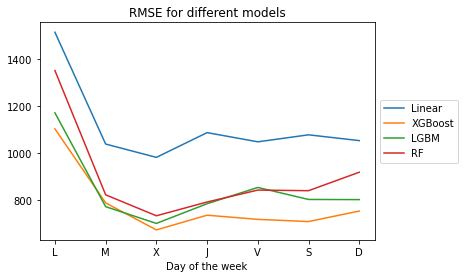

In [57]:
errors_weekly_rmse = weekly_error ('RMSE')

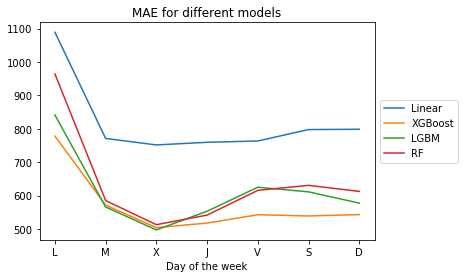

In [58]:
errors_weekly_rmse = weekly_error ('MAE')

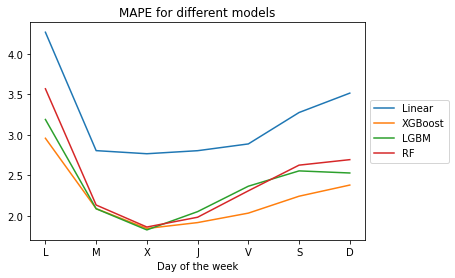

In [59]:
errors_weekly_rmse = weekly_error ('MAPE')

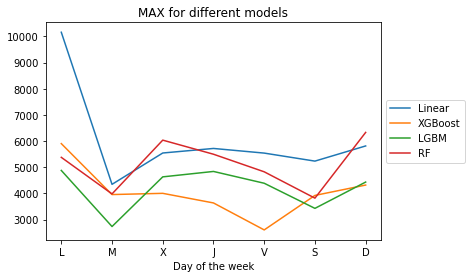

In [60]:
errors_weekly_rmse = weekly_error ('MAX')

### Histograms

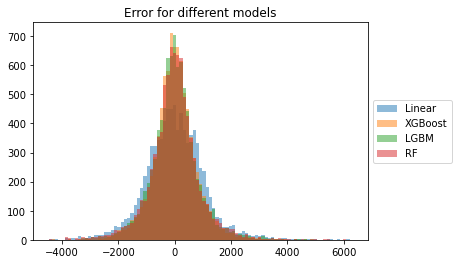

In [61]:
nbins = int (np.sqrt(len(y_test)))
# print (nbins)

for name in df_errors.keys():
    max_value = 0
    min_value = 0
    if max(df_errors[name]['Error']) >= max_value:
        max_value = max(df_errors[name]['Error'])
    if min(df_errors[name]['Error']) <= min_value:
        min_value = min(df_errors[name]['Error'])
bin_edges = np.linspace(min_value, max_value, nbins + 1)

plt.title('Error for different models')
for name in df_errors.keys():
    plt.hist(df_errors[name]['Error'], bins = bin_edges, label=name, alpha=0.5)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [62]:
variables = ['mean', 'sigma', 'mean+-1sigma', 'mean+-2sigma', 'mean+-3sigma', 'mean+-4sigma']
nsigmas = 4

error_stats = pd.DataFrame()

for name in df_errors.keys():
    aux = []
    length = len(df_errors[name])
    mean = np.mean(df_errors[name]['Error'])
    aux.append(mean)
    sigma = np.std(df_errors[name]['Error'])
    aux.append(sigma)
    for n in range(1,nsigmas+1):
        auxdf = df_errors[name][(df_errors[name]['Error']>=mean-n*sigma) & (df_errors[name]['Error']<=mean+n*sigma)]
        aux.append(len(auxdf)/length)
    error_stats [name] = aux

error_stats.index = variables
error_stats

,Linear,XGBoost,LGBM,RF
mean,14.006179,8.439608,5.951742,-7.456261
sigma,1125.564020,793.157614,851.595488,919.134799
mean+-1sigma,0.768379,0.758105,0.754566,0.777626
mean+-2sigma,0.949886,0.947603,0.942922,0.942123
mean+-3sigma,0.986301,0.987100,0.984361,0.983562
mean+-4sigma,0.995434,0.995890,0.996347,0.993950


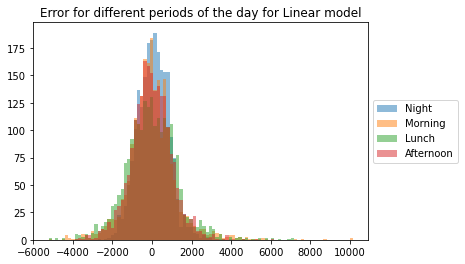

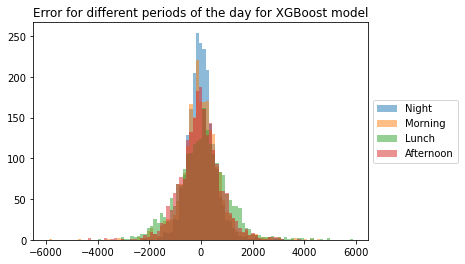

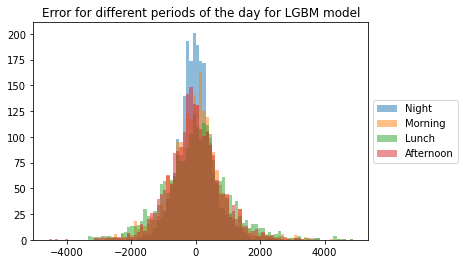

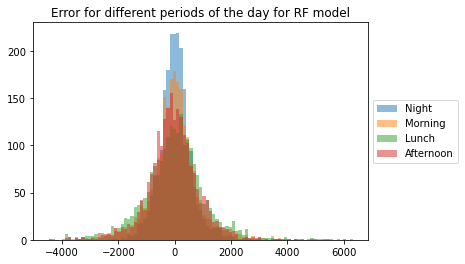

In [63]:
day_division = {
    'Night': [x for x in range (6)],
    'Morning': [x for x in range (6,12)],
    'Lunch': [x for x in range (12, 18)],
    'Afternoon': [x for x in range (18,24)]
    
}

nbins = int (np.sqrt(len(y_test)))
# print (nbins)

for name in df_errors.keys():
    plt.title('Error for different periods of the day for '+name+' model')
    max_value = 0
    min_value = 0
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        if max(auxdf['Error']) >= max_value:
            max_value = max(auxdf['Error'])
        if min(auxdf['Error']) <= min_value:
            min_value = min(auxdf['Error'])
    bin_edges = np.linspace(min_value, max_value, nbins + 1)
    for period in day_division.keys():
        auxdf = df_errors[name][df_errors[name]['Datetime'].dt.hour.isin(day_division[period])]
        plt.hist(auxdf['Error'], bins = bin_edges, label=period, alpha=0.5)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()